In [1]:
from sqlalchemy import create_engine, text 
import pandas as pd 
import dbutils as db 
import numpy as np 
from sklearn.preprocessing import MinMaxScaler

## Domande sui dati
1. Raggruppare gli utenti con simili profili di interessi per i generi letterari (clustering)
2. Preso un utente, suggerire un libro che non ha letto sulla base del gradimento per i vari libri da parte di utenti con il profilo simile
   
```
book(id, title, pages, author, rating_count, description)
rating(book, user, rating)
genre(book, genre)
```

In [2]:
connection_string = "sqlite:////Users/flint/Data/kaggle/books/book-recommender/booksdb.sql"
books = db.Books(connection_string=connection_string)

## Visualize users

In [6]:
from sklearn.manifold import TSNE

In [4]:
tsne = TSNE(n_components=2)
p2d = tsne.fit_transform(books.profile.iloc[:1000])

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
p2d 

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x=p2d[:,0], y=p2d[:,1], alpha=0.2, s=10, c=assignment)
ax.scatter(x=centroids[:,0], y=centroids[:,1], 
        c=range(centroids.shape[0]), s=120)
ax.set_xlim(-60, 60)
ax.set_ylim(-60, 60)
plt.tight_layout()
plt.show()

## KMeans from scratch
1. decidere il parametro k (in questo esempio useremo il valore 6)
2. Generare casualmente k punti di partenza (centroidi)
3. Assegnare ogni punto al centroide più vicino
   1. Calcolare la distanza fra i punti e tutti i centroidi
   2. Assegnare i punti
4. Calcolare la RSS
5. Sostituire i centroidi con la media del cluster corrispondente

In [8]:
k = 6
indexes = np.random.choice(range(p2d.shape[0]), size=k, replace=False)
centroids = p2d[indexes]

#### Distanza

In [9]:
from sklearn.metrics import pairwise_distances

In [49]:
delta = pairwise_distances(p2d, centroids)

In [50]:
assignment = []
for user in delta:
    assignment.append(np.argmin(user))

In [ ]:
assignment[:6]

#### RSS

In [52]:
rss = 0
for i, user in enumerate(delta):
    d = delta[i, assignment[i]]
    rss += d

In [ ]:
rss 

#### Ridefinire i centroidi

In [45]:
clusters = {}
for i in range(centroids.shape[0]):
    cluster_points = []
    for j, a in enumerate(assignment):
        if a == i:
            cluster_points.append(p2d[j])
    clusters[i] = np.array(cluster_points)

In [ ]:
cluster_0 = clusters[1]

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(x=cluster_0[:,0], y=cluster_0[:,1], alpha=0.2, 
        s=20)
ax.set_xlim(-60, 60)
ax.set_ylim(-60, 60)
plt.tight_layout()
plt.show()

In [47]:
for k, v in clusters.items():
    centroids[k] = v.mean(axis=0)

In [ ]:
centroids

# Implementazione a oggetti

In [10]:
import dbutils as db 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
connection_string = "sqlite:////Users/flint/Data/kaggle/books/book-recommender/booksdb.sql"
books = db.Books(connection_string=connection_string)

In [3]:
kmeans = db.KMeans(k=6, data=books.profile.iloc[:1000].to_numpy())

In [4]:
history = kmeans.run(max_iterations=1000)

In [5]:
history 

[414.2428487017326,
 340.4854638455204,
 328.65802642622015,
 319.5794035754243,
 317.1368971438352,
 316.5388869189807,
 316.0807599267053,
 315.69609089839486,
 315.6226977602821,
 315.47072801617867,
 315.41006730998504,
 315.41006730998504]

In [7]:
tsne = TSNE(n_components=2)
p2d = tsne.fit_transform(books.profile.iloc[:1000])

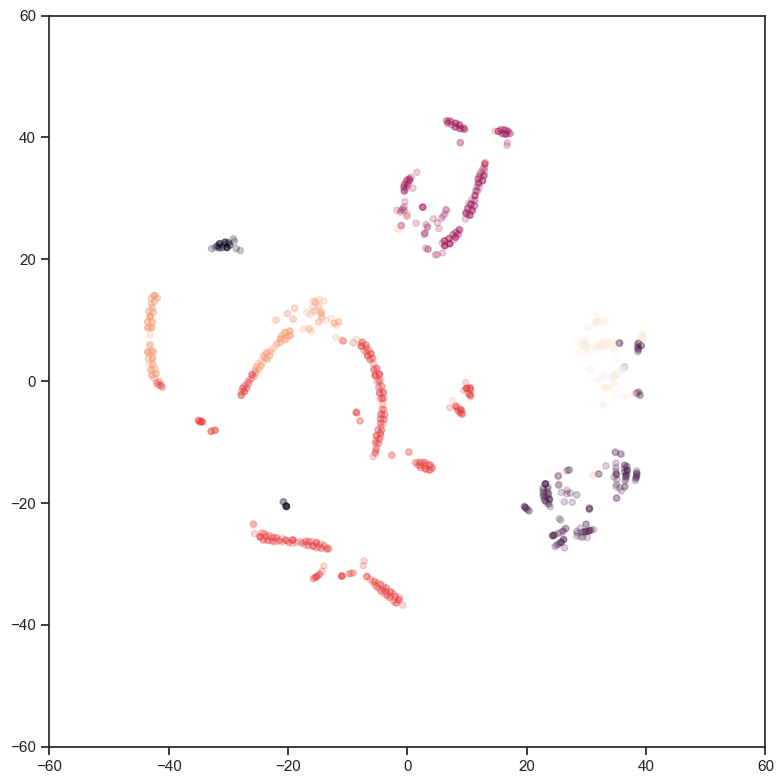

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x=p2d[:,0], y=p2d[:,1], alpha=0.2, s=20, c=kmeans.assignment)
ax.set_xlim(-60, 60)
ax.set_ylim(-60, 60)
plt.tight_layout()
plt.show()

In [13]:
from collections import defaultdict

In [15]:
clusters = defaultdict(list)
for i, cluster in enumerate(kmeans.assignment):
    clusters[cluster].append(i)

In [33]:
cl0 = clusters[5]
cl0[:6]

[0, 9, 12, 16, 17, 61]

In [29]:
users = books.profile.iloc[:1000]

In [30]:
users.iloc[13].sort_values(ascending=False)

biography             0.295238
historical fiction    0.295238
history               0.295238
fiction               0.291005
non-fiction           0.186047
fantasy               0.178161
paranormal            0.178161
romance               0.126984
young-adult           0.126984
children              0.000000
comics                0.000000
crime                 0.000000
graphic               0.000000
mystery               0.000000
thriller              0.000000
poetry                0.000000
Name: 55, dtype: float64

In [31]:
users.iloc[14].sort_values(ascending=False)

biography             0.390476
historical fiction    0.390476
history               0.390476
non-fiction           0.317829
comics                0.282759
graphic               0.282759
young-adult           0.216931
children              0.000000
crime                 0.000000
fantasy               0.000000
fiction               0.000000
mystery               0.000000
paranormal            0.000000
romance               0.000000
thriller              0.000000
poetry                0.000000
Name: 61, dtype: float64

In [34]:
users.iloc[cl0].mean(axis=0).sort_values(ascending=False)

biography             0.434716
historical fiction    0.434716
history               0.434716
crime                 0.361592
mystery               0.361592
thriller              0.361592
fiction               0.320362
fantasy               0.268570
paranormal            0.268570
young-adult           0.194459
romance               0.125277
comics                0.109677
graphic               0.109677
poetry                0.076105
children              0.052310
non-fiction           0.048679
dtype: float64